<a href="https://colab.research.google.com/github/Vincent3003/Analyze-Layoff-Data/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Leveraging Data Analytics to Optimize Workforce Management: </h1>
<h4>A Layoff Dataset Analysis </h4>

In [427]:
# import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline




# The first step is to mount your Google Drive to your Colab account.
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you throuh.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [401]:
path = '/content/drive/MyDrive/Project/layoffs_data(3).csv'

layoff = pd.read_csv(path)
print("data is a ", type(layoff))

data is a  <class 'pandas.core.frame.DataFrame'>


In [402]:
layoff.shape

(3485, 12)

In [403]:
print(layoff)

              Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

                           

In [404]:
layoff.isna()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3480,False,False,False,False,False,False,False,False,False,False,True,False
3481,False,False,False,False,False,False,False,False,False,False,False,False
3482,False,False,False,False,False,False,False,False,False,False,False,False
3483,False,False,False,False,False,False,False,False,False,False,False,False


In [405]:
# drop Source and List_of_Employees_Laid_Off columns since it is not neccesarily
layoff_new = layoff.drop(columns=['Source', 'List_of_Employees_Laid_Off', 'Date_Added'])

In [406]:
# rename Laid_Off_count column to Layoff
layoff_new.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

In [407]:
# Convert the 'Date' column to a datetime format
layoff_new['Quarter'] = pd.to_datetime(layoff_new['Date']).astype('Period[Q]')
layoff_new['Month'] = pd.to_datetime(layoff_new['Date']).dt.month
print(layoff_new)

              Company     Location_HQ        Industry  Percentage        Date  \
0              Fisker     Los Angeles  Transportation        0.15  2024-02-29   
1     Electronic Arts     SF Bay Area        Consumer        0.05  2024-02-28   
2              Vacasa        Portland          Travel        0.05  2024-02-28   
3      Treasury Prime     SF Bay Area         Finance        0.40  2024-02-28   
4            Motional          Boston  Transportation        0.05  2024-02-28   
...               ...             ...             ...         ...         ...   
3480          Service     Los Angeles          Travel        1.00  2020-03-16   
3481     HopSkipDrive     Los Angeles  Transportation        0.10  2020-03-13   
3482      Panda Squad     SF Bay Area        Consumer        0.75  2020-03-13   
3483    Tamara Mellon     Los Angeles          Retail        0.40  2020-03-12   
3484         EasyPost  Salt Lake City       Logistics         NaN  2020-03-11   

      Funds_Raised     Stag

In [408]:
# replace missing data to 0 value
print("before drop: ", layoff_new.shape)
layoff_new.fillna(0, inplace=True)
print("after drop: " , layoff_new.shape)

before drop:  (3485, 11)
after drop:  (3485, 11)


In [409]:
# see how many duplicate in a dataset & replace it
print('Amount of duplicates - Before: {:,}'.format(layoff_new.duplicated().sum()))
layoff_new.drop_duplicates(inplace=True)
print('Amount of duplicates - After: {:,}'.format(layoff_new.duplicated().sum()))

Amount of duplicates - Before: 2
Amount of duplicates - After: 0


In [410]:
layoff_new.tail(10)

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter,Month
3475,Popin,New York City,Fitness,1.00,2020-03-19,13.0,Unknown,United States,0.0,2020Q1,3
3476,Tuft & Needle,Phoenix,Retail,0.00,2020-03-19,0.0,Acquired,United States,0.0,2020Q1,3
3477,Flytedesk,Boulder,Marketing,0.20,2020-03-18,4.0,Seed,United States,4.0,2020Q1,3
3478,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,2020Q1,3
3479,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,2020Q1,3
3480,Service,Los Angeles,Travel,1.00,2020-03-16,5.1,Seed,United States,0.0,2020Q1,3
3481,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,2020Q1,3
3482,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,2020Q1,3
3483,Tamara Mellon,Los Angeles,Retail,0.40,2020-03-12,90.0,Series C,United States,20.0,2020Q1,3
3484,EasyPost,Salt Lake City,Logistics,0.00,2020-03-11,12.0,Series A,United States,75.0,2020Q1,3


In [411]:
layoff_new.dtypes

Company                object
Location_HQ            object
Industry               object
Percentage            float64
Date                   object
Funds_Raised          float64
Stage                  object
Country                object
Layoffs               float64
Quarter         period[Q-DEC]
Month                   int64
dtype: object

In [412]:
layoff_new[['Funds_Raised', 'Layoffs', 'Percentage']] = layoff_new[['Funds_Raised', 'Layoffs', 'Percentage']].astype(int)
layoff_new['Quarter'] = layoff_new[['Quarter']].astype(str)

layoff_new.dtypes

Company         object
Location_HQ     object
Industry        object
Percentage       int64
Date            object
Funds_Raised     int64
Stage           object
Country         object
Layoffs          int64
Quarter         object
Month            int64
dtype: object

In [413]:
# or in one step:
layoff_USA = layoff_new[ layoff_new['Country'] == 'United States' ]
layoff_USA

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,Quarter,Month
0,Fisker,Los Angeles,Transportation,0,2024-02-29,1700,Post-IPO,United States,0,2024Q1,2
1,Electronic Arts,SF Bay Area,Consumer,0,2024-02-28,2,Post-IPO,United States,670,2024Q1,2
2,Vacasa,Portland,Travel,0,2024-02-28,834,Post-IPO,United States,320,2024Q1,2
3,Treasury Prime,SF Bay Area,Finance,0,2024-02-28,71,Series C,United States,40,2024Q1,2
4,Motional,Boston,Transportation,0,2024-02-28,0,Unknown,United States,0,2024Q1,2
...,...,...,...,...,...,...,...,...,...,...,...
3480,Service,Los Angeles,Travel,1,2020-03-16,5,Seed,United States,0,2020Q1,3
3481,HopSkipDrive,Los Angeles,Transportation,0,2020-03-13,45,Unknown,United States,8,2020Q1,3
3482,Panda Squad,SF Bay Area,Consumer,0,2020-03-13,1,Seed,United States,6,2020Q1,3
3483,Tamara Mellon,Los Angeles,Retail,0,2020-03-12,90,Series C,United States,20,2020Q1,3


<h1>EDA Process to gain a better understanding of a data set, to find a trend/ pattern </h1>
<h3>1. Data Visualization</h3>

In [327]:
colors = ['#ffac81', '#ff928b', '#fec3a6', '#efe9ae', '#cdeac0', '#b8dbd9', '#eae8ff', '#b0d7ff', '#F2BEFC', '#708B75',
          '#d8d5db', '#d2d6ef', '#044B7F', '#abc4ab', '#6d4c3d', '#727D71', '#89A1EF', '#C6B9CD', '#0F5257', '#3A5A40']

In [252]:
# Grouping by industry and summing the layoffs
industry_layoffs = layoff_new.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig1 = go.Figure([go.Bar(x=industry_layoffs.index,
                          y=industry_layoffs.values,
                          text=industry_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs around the world', yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig1.show()

In [254]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs = layoff_new.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs = round(industry_percent_layoffs, 2)

# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig2 = go.Figure([go.Bar(x=industry_percent_layoffs.index,
                          y=industry_percent_layoffs.values,
                          text=industry_percent_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries have the highest percentages with the Most Layoffs around the world',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig2.show()

In [256]:
# Grouping by industry and summing the layoffs
industry_layoffs_USA = layoff_USA.groupby('Industry')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs_USA))

# Bar chart for top industries with the most layoffs
fig3 = go.Figure([go.Bar(x=industry_layoffs_USA.index,
                          y=industry_layoffs_USA.values,
                          text=industry_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries with the Most Layoffs in America',
                                   yaxis=dict(title='Total layoff'), xaxis=dict(title='Industry')))

fig3.show()

In [257]:
# Grouping by industry and summing the layoffs
industry_percent_layoffs_USA = layoff_USA.groupby('Industry')['Percentage'].mean().sort_values(ascending=False).head(20)
industry_percent_layoffs_USA = round(industry_percent_layoffs_USA, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_percent_layoffs_USA))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig4 = go.Figure([go.Bar(x=industry_percent_layoffs_USA.index,
                          y=industry_percent_layoffs_USA.values,
                          text=industry_percent_layoffs_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries Percentage with the Most Layoffs in America',
                                   yaxis=dict(title='Average percentage of layoff'), xaxis=dict(title='Industry')))

fig4.show()

In [258]:
# Grouping by industry and summing the layoffs
country_layoffs = layoff_new.groupby('Country')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig5 = go.Figure([go.Bar(x=country_layoffs.index,
                          y=country_layoffs.values,
                          text=country_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Countries with the Most Layoffs in the world'))

fig5.show()

In [259]:
# Grouping by industry and summing the layoffs
locatoin_layoffs = layoff_new.groupby('Location_HQ')['Layoffs'].sum().sort_values(ascending=False).head(20)

# Generate random colors from the provided list
random_colors = random.sample(colors, len(industry_layoffs))

# Bar chart for top industries with the most layoffs
fig6 = go.Figure([go.Bar(x=locatoin_layoffs.index,
                          y=locatoin_layoffs.values,
                          text=locatoin_layoffs.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Locations with the Most Layoffs in America'))

fig6.show()

In [262]:
# Grouping by industry and summing the layoffs
industry_fund_USA = layoff_USA.groupby('Industry')['Funds_Raised'].mean().sort_values(ascending=False).head(20)
industry_fund_USA = round(industry_fund_USA, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_fund_USA))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig7 = go.Figure([go.Bar(x=industry_fund_USA.index,
                          y=industry_fund_USA.values,
                          text=industry_fund_USA.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries raise Highest Fund in America',
                                   yaxis=dict(title='Average Funded'), xaxis=dict(title='Industry')))

fig7.show()

In [263]:
# Grouping by industry and summing the layoffs
industry_fund = layoff_new.groupby('Industry')['Funds_Raised'].mean().sort_values(ascending=False).head(20)
industry_fund = round(industry_fund, 2)


# Generate random colors from the provided list
# random_colors = [random.choice(colors) for _ in range(len(industry_layoffs))]   ## this line generate randomly but the color can repeat twice
random_colors = random.sample(colors, len(industry_fund))            # this line generate color randomly in a list but not happen twice

# Enhanced bar chart for top industries with the most layoffs
fig8 = go.Figure([go.Bar(x=industry_fund.index,
                          y=industry_fund.values,
                          text=industry_fund.values,
                          textposition='auto',
                          marker=dict(color=random_colors, line=dict(color='#000000', width=1)))],
                  layout=go.Layout(title='Top Industries raise Highest Fund in the world',
                                   yaxis=dict(title='Average Funded'), xaxis=dict(title='Industry')))

fig8.show()

In [264]:
# Create a dataframe that contains top 10 primary strength with their highest Layofss and Funds_Raised
bar=layoff_new.groupby(["Company", "Industry"])["Layoffs", "Funds_Raised"].median().nlargest(10, 'Layoffs')
bar

<ipython-input-264-cadcdaee222a>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,,Layoffs,Funds_Raised
Company,Industry,,
Meta,Consumer,10000.0,26000.0
Ericsson,Other,8500.0,663.0
SAP,Other,5500.0,1300.0
Philips,Healthcare,5000.0,0.0
Cisco,Infrastructure,4100.0,2.0
Flink,Food,4050.0,1000.0
Micron,Hardware,3600.0,50.0
Dell,Hardware,3325.0,0.0
Xerox,Hardware,3000.0,27200.0


Text(0.5, 0, 'Company and its Industry')

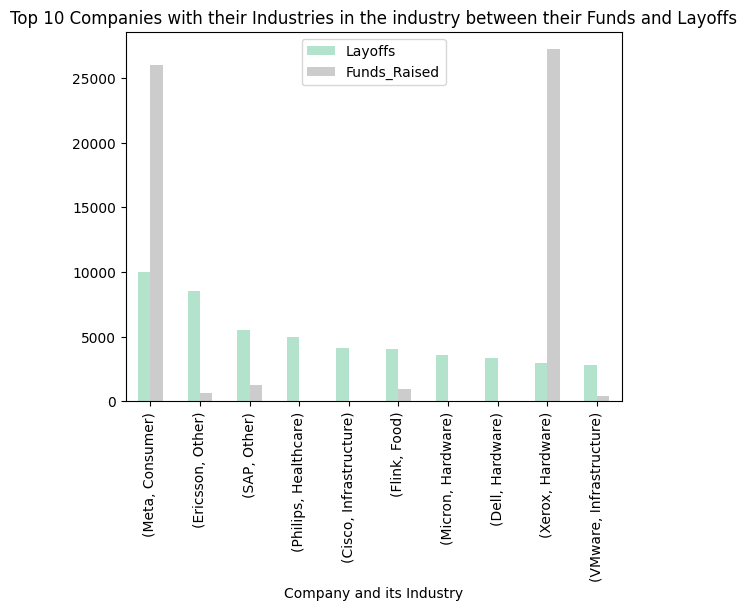

In [266]:
# create a bar graph to show top 10 Pokemon have Attack & Defense ability with their Primary Strength
bar.plot(kind = 'bar', title = 'Top 10 Companies with their Industries in the industry between their Funds and Layoffs', colormap='Pastel2')
plt.xlabel("Company and its Industry")

In [267]:
# Group by 'Date' and count the number of layoffs
layoff_trend = layoff_new.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig = px.line(layoff_trend, x='Date', y="Layoffs", markers = True,
              title='Trend of Layoffs Over Time around the world',)
fig.show()

<Figure size 1000x500 with 0 Axes>

In [268]:
# Group by 'Date' and count the number of layoffs
layoff_USA_trend = layoff_USA.groupby('Date')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_USA_trend, x='Date', y="Layoffs", markers = True,
              title='Trend of Layoffs Over Time in America',)
fig2.show()

<Figure size 1000x500 with 0 Axes>

In [269]:
# Group by 'Quarter' and sum the number of layoffs
layoff_USA_quarterly = layoff_USA.groupby('Quarter')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_USA_quarterly, x='Quarter', y="Layoffs", markers=True,
                title='Trend of Layoffs Over Time in America (Quarterly)')
fig2.show()

<Figure size 1000x500 with 0 Axes>

In [270]:
# Group by 'Quarter' and sum the number of layoffs
layoff_quarterly = layoff_new.groupby('Quarter')['Layoffs'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 5))
fig2 = px.line(layoff_quarterly, x='Quarter', y="Layoffs", markers=True,
                title='Trend of Layoffs Over Time in America (Quarterly)')
fig2.show()

<Figure size 1000x500 with 0 Axes>

<h3>2. Finding relationships and correlation between variables</h3>

In [359]:
layoff_new.describe()

,Percentage,Funds_Raised,Layoffs,Month
count,3483.000000,3483.000000,3483.000000,3483.000000
mean,0.066035,694.241746,164.662934,5.982773
std,0.248379,4545.648220,643.564850,3.411007
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,27.500000,0.000000,3.000000
50%,0.000000,130.000000,38.000000,6.000000
75%,0.000000,405.500000,109.000000,9.000000
max,1.000000,121900.000000,12000.000000,12.000000


In [360]:
 print(np.corrcoef(layoff_new['Layoffs'], layoff_new['Funds_Raised']))

[[1.         0.10041882]
 [0.10041882 1.        ]]


In [361]:
corr_matrix = layoff_new.corr()
corr_matrix

<ipython-input-361-8f2499739d77>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Percentage,Funds_Raised,Layoffs,Month
Percentage,1.000000,-0.034712,-0.046599,0.038292
Funds_Raised,-0.034712,1.000000,0.100419,0.000060
Layoffs,-0.046599,0.100419,1.000000,-0.068393
Month,0.038292,0.000060,-0.068393,1.000000


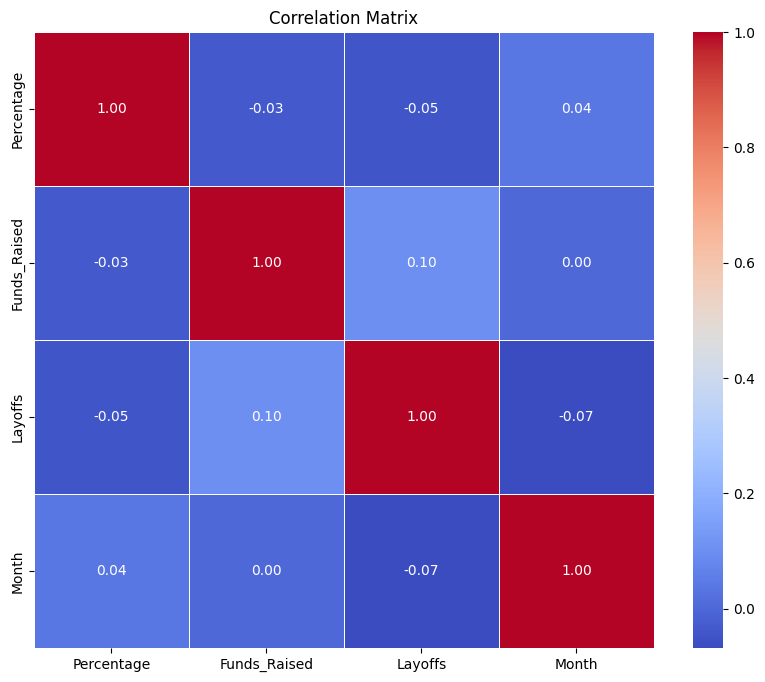

In [362]:
# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [363]:
# Select the top 20 rows based on the 'Layoffs' column
top_15 = layoff_new.nlargest(15, 'Layoffs')

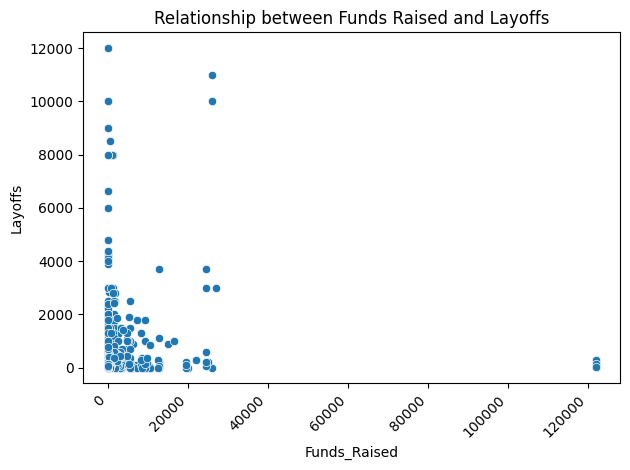

In [364]:
# Plotting the scatter plot
# plt.figure(figsize=(12, 20))
sns.scatterplot(x='Funds_Raised', y='Layoffs', data=layoff_new)
plt.title('Relationship between Funds Raised and Layoffs')
plt.xlabel('Funds_Raised')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

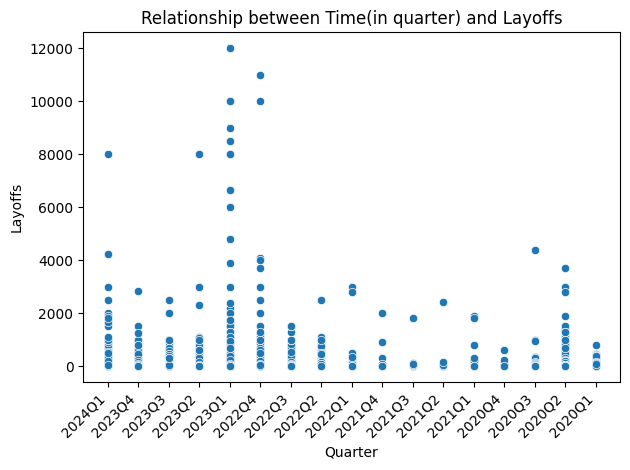

In [365]:
# Plotting the scatter plot
sns.scatterplot(x='Quarter', y='Layoffs', data=layoff_new)
plt.title('Relationship between Time(in quarter) and Layoffs')
plt.xlabel('Quarter')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

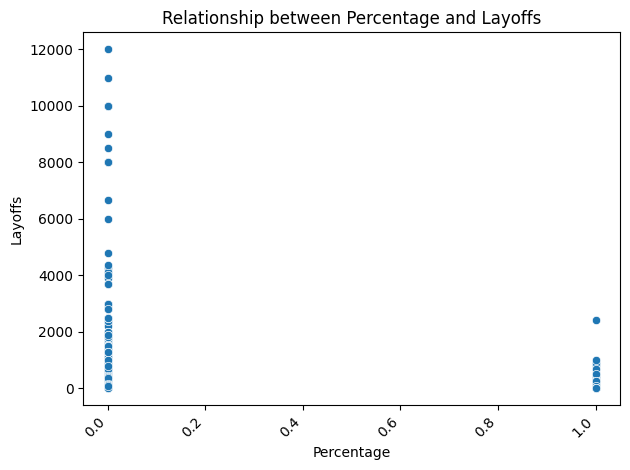

In [366]:
# Plotting the scatter plot
# plt.figure(figsize=(12, 20))
sns.scatterplot(x='Percentage', y='Layoffs', data=layoff_new)
plt.title('Relationship between Percentage and Layoffs')
plt.xlabel('Percentage')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

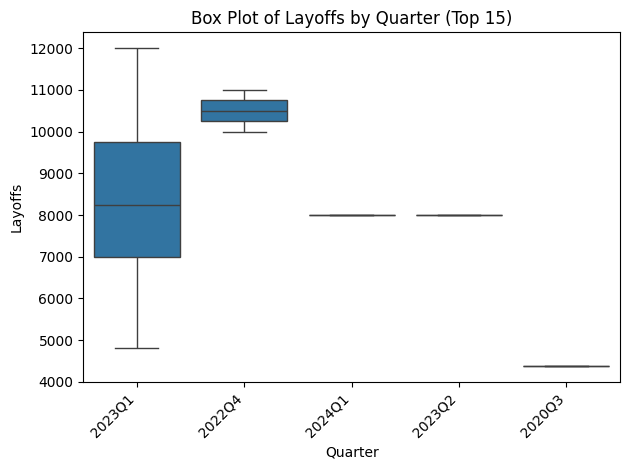

In [368]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Quarter', y='Layoffs', data=top_15)
plt.title('Box Plot of Layoffs by Quarter (Top 15)')
plt.xlabel('Quarter')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

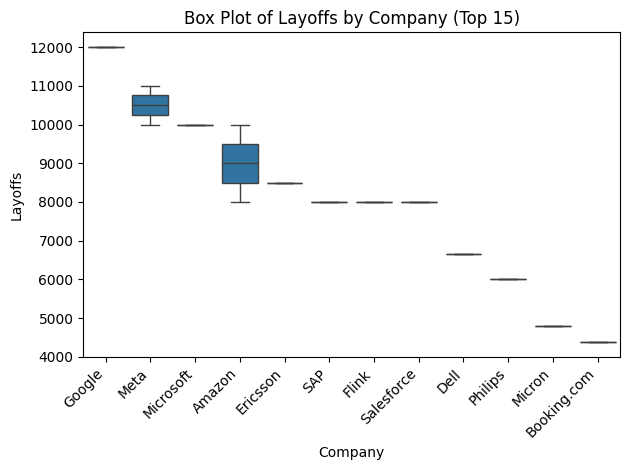

In [369]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Company', y='Layoffs', data=top_15)
plt.title('Box Plot of Layoffs by Company (Top 15)')
plt.xlabel('Company')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

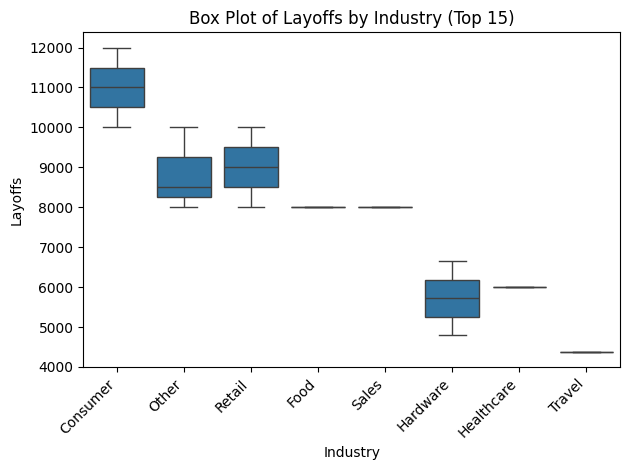

In [370]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Industry', y='Layoffs', data=top_15)
plt.title('Box Plot of Layoffs by Industry (Top 15)')
plt.xlabel('Industry')
plt.ylabel('Layoffs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

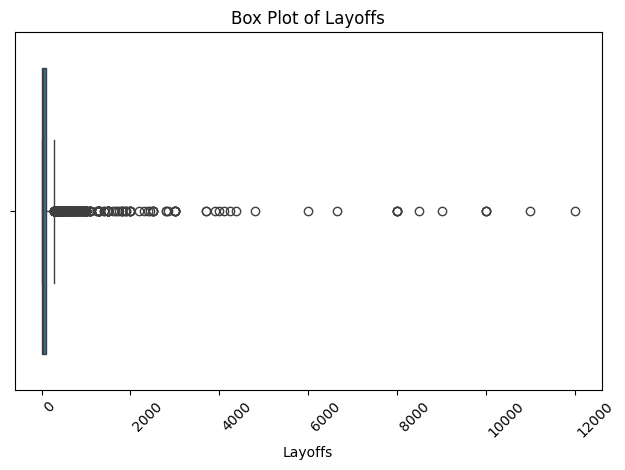

In [371]:
# Plotting the box plot
# plt.figure(figsize=(12, 20))
sns.boxplot(x='Layoffs', data=layoff_new)
plt.title('Box Plot of Layoffs')
plt.xlabel('Layoffs')
plt.xticks(rotation=45, ha='left')
plt.tight_layout()
plt.show()

<h3>3. Build a model to predictive modeling</h3>

<h5>1> Build a Random Forest Model</h5>

In [428]:
# Drop unnecessary columns (e.g., Company, Date)
layoff_model = layoff_new.drop(columns=['Company', 'Date'])

In [429]:
print(layoff_model)

      Location_HQ  Industry  Percentage  Funds_Raised  Stage  Country  \
0             126        28           0          1700      1       60   
1             185         3           0             2      1       60   
2             174        29           0           834      1       60   
3             185         8           0            71      6       60   
4              26        28           0             0     15       60   
...           ...       ...         ...           ...    ...      ...   
3480          126        29           1             5      3       60   
3481          126        28           0            45     15       60   
3482          185         3           0             1      3       60   
3483          126        24           0            90      6       60   
3484          188        16           0            12      4       60   

      Layoffs  Quarter  Month  
0           0       16      2  
1         670       16      2  
2         320       16     

In [430]:
# Convert categorical variables to numerical representations
label_encoders = {}
categorical_columns = ['Company', 'Location_HQ', 'Industry', 'Stage', 'Country', 'Quarter']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    layoff_new[col] = label_encoders[col].fit_transform(layoff_new[col])

In [431]:
# Split the data into features and target
X = layoff_model.drop('Layoffs', axis=1)
y = layoff_model['Layoffs']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [432]:
# take a look at the data... make sure you understand what split of data is stored in each
print('train_data shape: ',X_train.shape)
print('test_data shape: ',y_train.shape)
print('train_sln shape: ',X_test.shape)
print('test_sln shape: ',y_test.shape)


train_data shape:  (2786, 8)
test_data shape:  (2786,)
train_sln shape:  (697, 8)
test_sln shape:  (697,)


In [433]:
print(f"X_train data type: {type(X_train)}")
print(f"Y_train data type: {type(y_train)}")

X_train data type: <class 'pandas.core.frame.DataFrame'>
Y_train data type: <class 'pandas.core.series.Series'>


In [289]:
layoff_new['Country'].unique()

array(['United States', 'Singapore', 'India', 'Australia', 'Poland',
       'United Kingdom', 'Sweden', 'Israel', 'Germany', 'Norway',
       'Finland', 'Canada', 'Cayman Islands', 'Czech Republic',
       'Lithuania', 'Nigeria', 'Austria', 'Indonesia', 'Japan', 'Estonia',
       'Pakistan', 'Netherlands', 'China', 'France', 'Romania',
       'Switzerland', 'Brazil', 'Ghana', 'Hong Kong', 'Kenya', 'Spain',
       'Ireland', 'New Zealand', 'Luxembourg', 'Mexico', 'South Korea',
       'Chile', 'Saudi Arabia', 'Philippines', 'Ukraine', 'Italy',
       'Portugal', 'Colombia', 'Argentina', 'Seychelles', 'Egypt',
       'Greece', 'Belgium', 'Denmark', 'Malaysia', 'Hungary', 'Vietnam',
       'Thailand', 'Senegal', 'United Arab Emirates', 'Peru', 'Bahrain',
       'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'South Africa',
       'Myanmar'], dtype=object)

In [434]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [435]:
# Evaluate the model
y_pred_train = rf_model.predict(X_train)

In [438]:
train_rmse = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
print("Training MSE:", train_rmse)

y_pred_test = rf_model.predict(X_test)
test_rmse = metrics.mean_squared_error(y_test, y_pred_test, squared=False)
print("Testing MSE:", test_rmse)

Training MSE: 246.46083346533024
Testing MSE: 682.9097373984698
